In [1]:
# 导入包得到env
from mlagents_envs.environment import UnityEnvironment
# This is a non-blocking call that only loads the environment.
env = UnityEnvironment(file_name="test", seed=1, side_channels=[])
# Start interacting with the environment.

E0607 16:11:17.416169000 8595623424 fork_posix.cc:76]                  Other threads are currently calling into gRPC, skipping fork() handlers


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

In [2]:
# 先让他走几步直到需要交互
env.step()

In [3]:
# 得到agent的behaviro那个的名字，如果multi agent的话我觉得应该可以实现
test = env.behavior_specs.keys()
# print(test)
for t in test:
    print(t)

CleaningAgent?team=0


In [4]:
# 这个spec里面有一些东西 虽然不知道有没有用，很离谱
behavior_name = 'CleaningAgent?team=0'
spec = env.behavior_specs['CleaningAgent?team=0']

In [5]:
# 产生四个控制动作
import numpy as np
a = []
for act in range(5):
    a.append(spec.action_spec.empty_action(1))
    a[act].add_discrete(np.int32([[act]]))
stop = a[0]
forward = a[1]
backward = a[2]
turn_right = a[3]
turn_left = a[4]

In [7]:
# 这里尝试让他走走， reset是回到初始状态
print("new")
env.reset()
# 我觉得这个相当于state了 很奇葩，里面可以拿到sensor数据，还可以判断是否终止
decision_steps, terminal_steps = env.get_steps(behavior_name)
# 看有几个agent
tracked_agent = -1 # -1 indicates not yet tracking
done = False # For the tracked_agent

episode_rewards = 0 # For the tracked_agent

# 简单让他前后右转左转四个动作来回
while not done:
    # Track the first agent we see if not tracking
    # Note : len(decision_steps) = [number of agents that requested a decision]
    if tracked_agent == -1 and len(decision_steps) >= 1:
        tracked_agent = decision_steps.agent_id[0]

    # Generate an action for all agents
#     action = spec.action_spec.random_action(len(decision_steps))
# #     print(spec.action_spec)
#     print(action.continuous)
#     print(action.discrete)
#     print("+++++++++++++++++++")

    # Get the observation
    # print(spec.observation_specs)
    # print("+++++++++++++++++++")

    # Set the actions
    env.set_actions(behavior_name, forward)

    # Move the simulation forward
    env.step()

    # Get the new simulation results
    decision_steps, terminal_steps = env.get_steps(behavior_name)
    print(decision_steps, terminal_steps) 
    print("~~~~~~~~~~~~~~~~~~~~~")
    if tracked_agent in decision_steps: # The agent requested a decision
        episode_rewards += decision_steps[tracked_agent].reward
    if tracked_agent in terminal_steps: # The agent terminated its episode
        episode_rewards += terminal_steps[tracked_agent].reward
        done = True
        
    # Set the actions
    env.set_actions(behavior_name, forward)

    # Move the simulation forward
    env.step()

    # Get the new simulation results
    decision_steps, terminal_steps = env.get_steps(behavior_name)
    print(decision_steps, terminal_steps) 
    print("~~~~~~~~~~~~~~~~~~~~~")
    if tracked_agent in decision_steps: # The agent requested a decision
        episode_rewards += decision_steps[tracked_agent].reward
    if tracked_agent in terminal_steps: # The agent terminated its episode
        episode_rewards += terminal_steps[tracked_agent].reward
        done = True
        
    # Set the actions
    env.set_actions(behavior_name, turn_right)

    # Move the simulation forward
    env.step()

    # Get the new simulation results
    decision_steps, terminal_steps = env.get_steps(behavior_name)
    print(decision_steps, terminal_steps) 
    print("~~~~~~~~~~~~~~~~~~~~~")
    if tracked_agent in decision_steps: # The agent requested a decision
        episode_rewards += decision_steps[tracked_agent].reward
    if tracked_agent in terminal_steps: # The agent terminated its episode
        episode_rewards += terminal_steps[tracked_agent].reward
        done = True
        
    # Set the actions
    env.set_actions(behavior_name, backward)

    # Move the simulation forward
    env.step()

    # Get the new simulation results
    decision_steps, terminal_steps = env.get_steps(behavior_name)
    print(decision_steps, terminal_steps) 
    print("~~~~~~~~~~~~~~~~~~~~~")
    if tracked_agent in decision_steps: # The agent requested a decision
        episode_rewards += decision_steps[tracked_agent].reward
    if tracked_agent in terminal_steps: # The agent terminated its episode
        episode_rewards += terminal_steps[tracked_agent].reward
        done = True
        
    # Set the actions
    env.set_actions(behavior_name, turn_left)

    # Move the simulation forward
    env.step()

    # Get the new simulation results
    decision_steps, terminal_steps = env.get_steps(behavior_name)
    print(decision_steps, terminal_steps) 
    print("~~~~~~~~~~~~~~~~~~~~~")
    if tracked_agent in decision_steps: # The agent requested a decision
        episode_rewards += decision_steps[tracked_agent].reward
    if tracked_agent in terminal_steps: # The agent terminated its episode
        episode_rewards += terminal_steps[tracked_agent].reward
        done = True
        
    # Set the actions
    env.set_actions(behavior_name, stop)

    # Move the simulation forward
    env.step()

    # Get the new simulation results
    decision_steps, terminal_steps = env.get_steps(behavior_name)
    print(decision_steps, terminal_steps) 
    print("~~~~~~~~~~~~~~~~~~~~~")
    if tracked_agent in decision_steps: # The agent requested a decision
        episode_rewards += decision_steps[tracked_agent].reward
    if tracked_agent in terminal_steps: # The agent terminated its episode
        episode_rewards += terminal_steps[tracked_agent].reward
        done = True

new
<mlagents_envs.base_env.DecisionSteps object at 0x7fc909b3efa0> <mlagents_envs.base_env.TerminalSteps object at 0x7fc909b3ea60>
~~~~~~~~~~~~~~~~~~~~~
<mlagents_envs.base_env.DecisionSteps object at 0x7fc909b3eee0> <mlagents_envs.base_env.TerminalSteps object at 0x7fc909b3e190>
~~~~~~~~~~~~~~~~~~~~~
<mlagents_envs.base_env.DecisionSteps object at 0x7fc909b3ea60> <mlagents_envs.base_env.TerminalSteps object at 0x7fc909b3e610>
~~~~~~~~~~~~~~~~~~~~~
<mlagents_envs.base_env.DecisionSteps object at 0x7fc909b3e190> <mlagents_envs.base_env.TerminalSteps object at 0x7fc909b3e880>
~~~~~~~~~~~~~~~~~~~~~
<mlagents_envs.base_env.DecisionSteps object at 0x7fc909b3e610> <mlagents_envs.base_env.TerminalSteps object at 0x7fc909b3e5b0>
~~~~~~~~~~~~~~~~~~~~~
<mlagents_envs.base_env.DecisionSteps object at 0x7fc909b3eee0> <mlagents_envs.base_env.TerminalSteps object at 0x7fc909b3e190>
~~~~~~~~~~~~~~~~~~~~~
<mlagents_envs.base_env.DecisionSteps object at 0x7fc909e55190> <mlagents_envs.base_env.Terminal

KeyboardInterrupt: 

In [ ]:
# 下面不用管

In [5]:
# for episode in range(1):
# 这里尝试让他走走， reset是回到初始状态
print("new")
env.reset()
# 我觉得这个相当于state了 很奇葩，里面可以拿到sensor数据，还可以判断是否终止
decision_steps, terminal_steps = env.get_steps(behavior_name)
print(decision_steps, terminal_steps) 

tracked_agent = -1 # -1 indicates not yet tracking
done = False # For the tracked_agent

episode_rewards = 0 # For the tracked_agent

while not done:
    # Track the first agent we see if not tracking
    # Note : len(decision_steps) = [number of agents that requested a decision]
    if tracked_agent == -1 and len(decision_steps) >= 1:
        tracked_agent = decision_steps.agent_id[0]

    # Generate an action for all agents
    action = spec.action_spec.random_action(len(decision_steps))
#     print(spec.action_spec)
    print(action.continuous)
    print(action.discrete)
    print("+++++++++++++++++++")

    # Get the observation
    print(spec.observation_specs)
    print("+++++++++++++++++++")

    # Set the actions
    env.set_actions(behavior_name, action)

    # Move the simulation forward
    env.step()

    # Get the new simulation results
    decision_steps, terminal_steps = env.get_steps(behavior_name)
    print(decision_steps, terminal_steps) 
    print("~~~~~~~~~~~~~~~~~~~~~")
    if tracked_agent in decision_steps: # The agent requested a decision
        episode_rewards += decision_steps[tracked_agent].reward
    if tracked_agent in terminal_steps: # The agent terminated its episode
        episode_rewards += terminal_steps[tracked_agent].reward
        done = True

#     print(f"Total rewards for episode {episode} is {episode_rewards}")

new
<mlagents_envs.base_env.DecisionSteps object at 0x7fd2e13a6610> <mlagents_envs.base_env.TerminalSteps object at 0x7fd2e13a6670>
[]
[[0]]
+++++++++++++++++++
[ObservationSpec(shape=(84, 84, 3), dimension_property=(<DimensionProperty.TRANSLATIONAL_EQUIVARIANCE: 2>, <DimensionProperty.TRANSLATIONAL_EQUIVARIANCE: 2>, <DimensionProperty.NONE: 1>), observation_type=<ObservationType.DEFAULT: 0>, name='CameraSensor'), ObservationSpec(shape=(0,), dimension_property=(<DimensionProperty.NONE: 1>,), observation_type=<ObservationType.DEFAULT: 0>, name='VectorSensor'), ObservationSpec(shape=(4,), dimension_property=(<DimensionProperty.NONE: 1>,), observation_type=<ObservationType.DEFAULT: 0>, name='VectorSensor_size4')]
+++++++++++++++++++
<mlagents_envs.base_env.DecisionSteps object at 0x7fd2e13a61c0> <mlagents_envs.base_env.TerminalSteps object at 0x7fd2e13a6fa0>
~~~~~~~~~~~~~~~~~~~~~
[]
[[3]]
+++++++++++++++++++
[ObservationSpec(shape=(84, 84, 3), dimension_property=(<DimensionProperty.TRANSL

UnityCommunicatorStoppedException: Communicator has exited.

In [8]:
# dir(decision_steps)
# print(decision_steps.obs)
print(spec.observation_specs)
# print(decision_steps.action_mask)

# dir(env)
# print(spec.observation_specs[0])

[ObservationSpec(shape=(56,), dimension_property=(<DimensionProperty.NONE: 1>,), observation_type=<ObservationType.DEFAULT: 0>, name='RayPerceptionSensor'), ObservationSpec(shape=(56,), dimension_property=(<DimensionProperty.NONE: 1>,), observation_type=<ObservationType.DEFAULT: 0>, name='RayPerceptionSensor1'), ObservationSpec(shape=(56,), dimension_property=(<DimensionProperty.NONE: 1>,), observation_type=<ObservationType.DEFAULT: 0>, name='RayPerceptionSensor2'), ObservationSpec(shape=(4,), dimension_property=(<DimensionProperty.NONE: 1>,), observation_type=<ObservationType.DEFAULT: 0>, name='VectorSensor_size4')]


In [109]:
# 这样可以设置在x/y轴走的步子， 如果是设置的是离散的话，就可以停下 跳跃之类的
a.add_continuous(np.array([1,0]))

In [6]:
action.continuous # 

array([], shape=(1, 0), dtype=float32)

In [21]:
# a.discrete

array([[0],
       [0],
       [0],
       [0]], dtype=int32)

In [10]:
a.add_discrete(

array([[0]], dtype=int32)

In [17]:
import numpy as np


In [18]:
forward = np.int32([[1]])

array([[1]], dtype=int32)

In [ ]:
# 后面好像没什么用了，我忘了我在干嘛

In [33]:
behavior_name = list(env.behavior_specs)[0]

In [34]:
print(behavior_name)

Hallway?team=0


In [35]:
spec = env.behavior_specs[behavior_name]

In [36]:
print(spec)

BehaviorSpec(observation_specs=[ObservationSpec(shape=(105,), dimension_property=(<DimensionProperty.NONE: 1>,), observation_type=<ObservationType.DEFAULT: 0>, name='StackingSensor_size3_RayPerceptionSensor'), ObservationSpec(shape=(3,), dimension_property=(<DimensionProperty.NONE: 1>,), observation_type=<ObservationType.DEFAULT: 0>, name='StackingSensor_size3_VectorSensor_size1')], action_spec=ActionSpec(continuous_size=0, discrete_branches=(5,)))


In [37]:
# Is the Action continuous or multi-discrete ?
if spec.action_spec.continuous_size > 0:
  print(f"There are {spec.action_spec.continuous_size} continuous actions")
if spec.action_spec.is_discrete():
  print(f"There are {spec.action_spec.discrete_size} discrete actions")


# How many actions are possible ?
#print(f"There are {spec.action_size} action(s)")

# For discrete actions only : How many different options does each action has ?
if spec.action_spec.discrete_size > 0:
  for action, branch_size in enumerate(spec.action_spec.discrete_branches):
    print(f"Action number {action} has {branch_size} different options")

There are 1 discrete actions
Action number 0 has 5 different options


In [38]:
decision_steps, terminal_steps = env.get_steps(behavior_name)

In [43]:
env.set_actions(behavior_name, spec.action_spec.empty_action(len(decision_steps)))

In [44]:
env.step()

In [119]:
"""
Plays an episode of UnityEnvironment Banana.exe using actions inferred
from trained weights loaded from file (checkpoint.pth)
"""
from mlagents_envs.environment import UnityEnvironment
# This is a non-blocking call that only loads the environment.
env = UnityEnvironment(file_name="multiroom", seed=1, side_channels=[])
# Start interacting with the environment.
env.reset()


# actions
action_size = brain.vector_action_space_size

# state space
state_size = len(env_info.vector_observations[0])

env_info = env.reset(train_mode=False)[brain_name]  # reset the environment
state = env_info.vector_observations[0]  # get the current state
score = 0  # initialize the score

# create agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

while True:
    action = agent.act(state).astype(int)  # select an action based on state
    env_info = env.step(action)[brain_name]  # send the action to the environment
    next_state = env_info.vector_observations[0]  # get the next state
    reward = env_info.rewards[0]  # get the reward
    done = env_info.local_done[0]  # see if episode has finished
    score += reward  # update the score
    state = next_state  # roll over the state to next time step
    if done:  # exit loop if episode finished
        break

print("Score: {}".format(score))


In [120]:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0.11410640661270847, 0.015287359751546192, 'z')

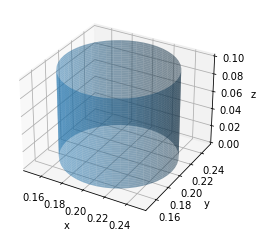

In [121]:
fig

In [122]:
degree = 0

In [123]:
step = 1

In [124]:
x = 0.2 + step*np.cos(0)
y = 0.2 + step*np.sin(0)

In [127]:
x, y

(1.2, 0.2)

In [125]:
Xc,Yc,Zc = data_for_cylinder_along_z(x,y,0.05,0.1)
ax.plot_surface(Xc, Yc, Zc, alpha=0.5)

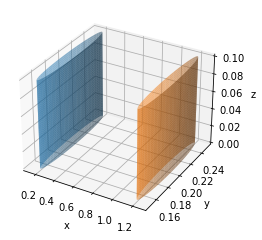

In [126]:
fig

/var/folders/p2/fj_ptp_x055gqt839fj3ws6m0000gn/T/ipykernel_70059/3057238921.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=30, elev=30)


Text(0.5, 0, 'z-axis')

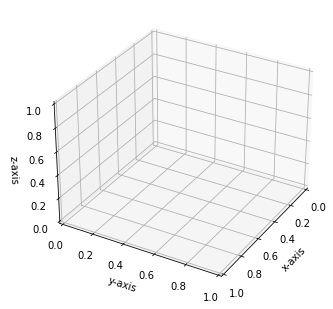

In [129]:
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
fig=plt.figure()
ax = Axes3D(fig, azim=30, elev=30)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

In [130]:
def plot_3D_cylinder(ax, radius, height, elevation=0, resolution=100, color='r', x_center = 0, y_center = 0):
    x = np.linspace(x_center-radius, x_center+radius, resolution)
    z = np.linspace(elevation, elevation+height, resolution)
    X, Z = np.meshgrid(x, z)

    Y = np.sqrt(radius**2 - (X - x_center)**2) + y_center # Pythagorean theorem

    ax.plot_surface(X, Y, Z, linewidth=0, color=color)
    ax.plot_surface(X, (2*y_center-Y), Z, linewidth=0, color=color)

    floor = Circle((x_center, y_center), radius, color=color)
    ax.add_patch(floor)
    art3d.pathpatch_2d_to_3d(floor, z=elevation, zdir="z")

    ceiling = Circle((x_center, y_center), radius, color=color)
    ax.add_patch(ceiling)
    art3d.pathpatch_2d_to_3d(ceiling, z=elevation+height, zdir="z")

In [131]:
# params
radius = 3
height = 10
elevation = -5
resolution = 100
color = 'r'
x_center = 3
y_center = -2

plot_3D_cylinder(ax, radius, height, elevation=elevation, resolution=resolution, color=color, x_center=x_center, y_center=y_center)

In [139]:
step = 10
degree = 45
x_center = x_center + step*np.cos(degree)
y_center = y_center + step*np.sin(degree)

In [140]:
plot_3D_cylinder(ax, radius, height, elevation=elevation, resolution=resolution, color=color, x_center=x_center, y_center=y_center)

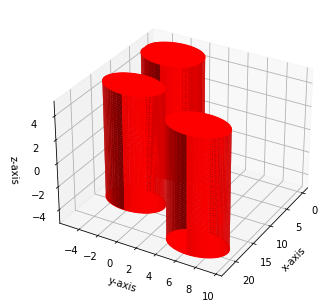

In [141]:
fig

In [143]:
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])
z = np.array([1,2,3,4,5])

In [144]:
x+y+z

array([ 3,  6,  9, 12, 15])

In [147]:
(x+y+z)/3

array([1., 2., 3., 4., 5.])

In [153]:
c = np.concatenate((x,y), axis=0)

In [154]:
c

array([1, 2, 3, 4, 5, 1, 2, 3, 4, 5])